In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 39.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
#

import koreanize_matplotlib

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

#Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

* 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
* describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
* 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
* 데이터는 위에서 제공된 데이터를 사용합니다.
* 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

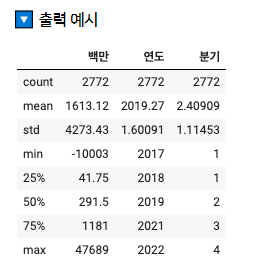

## A1

In [ ]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   데이터      2772 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 108.4+ KB


In [ ]:
# '시점' 컬럼에서 연도와 분기를 추출하여 '연도'와 '분기' 컬럼을 생성
df['연도'] = df['시점'].str.split('.').str[0].astype(int)
df['분기'] = df['시점'].str.split('.').str[1].str.split('/').str[0].astype(int)

# '데이터' 컬럼의 값을 "백만" 단위로 변경
df['백만'] = df['데이터']


In [ ]:
desc_stats = df[['백만', '연도', '분기']].describe()
desc_stats.round(2)


,백만,연도,분기
count,2772.00,2772.00,2772.00
mean,1613.12,2019.27,2.41
std,4273.43,1.60,1.11
min,-10003.00,2017.00,1.00
25%,41.75,2018.00,1.00
50%,291.50,2019.00,2.00
75%,1181.00,2021.00,3.00
max,47689.00,2022.00,4.00


In [ ]:
column_types = df[['백만', '연도', '분기']].dtypes
print(column_types)


백만    int64
연도    int64
분기    int64
dtype: object


1. 백만컬럼
  * 평균 판매액은 1613 백만원, 표준편차가 커서 데이터간 차이가 큼
  * 음수값이 존재 -> 데이터의 오류나 환불, 할인 프로모션 등의 존재 유무 체크필요
2. 연도 & 분기컬럼
  * min - max 범위로 데이터의 기간 확인 가능
  * 분기컬럼으로 1~4분기 모든 분기기간이 포함됨을 확인 가능

# Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

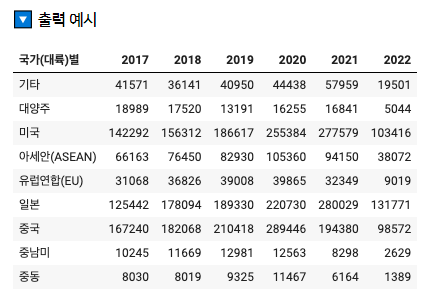

## A2

In [ ]:
sales_pivot = df.pivot_table(index='국가(대륙)별', columns='연도', values='백만', aggfunc='sum')
sales_pivot


연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


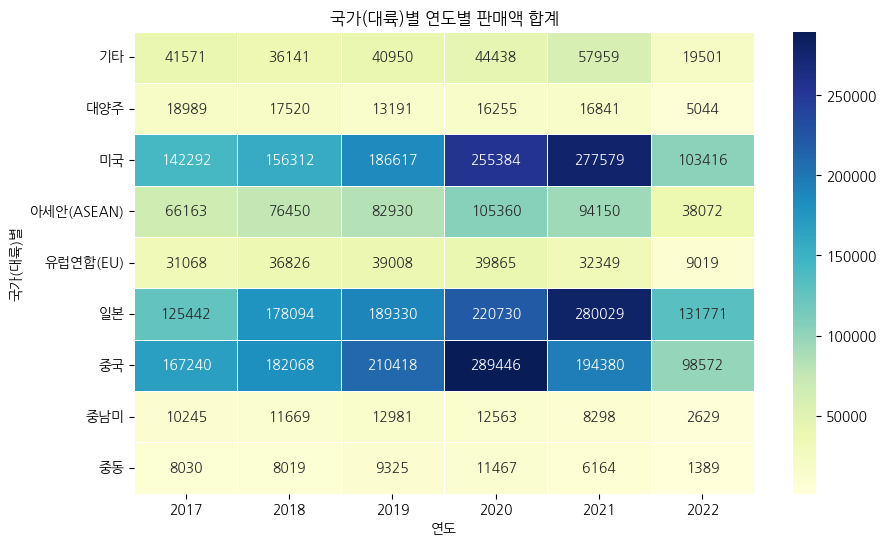

In [ ]:
# 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title("국가(대륙)별 연도별 판매액 합계")
plt.show()


#Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

* 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

## A3

In [ ]:
# 2020년의 온라인 해외판매 상품군을 지역별 합계 집계
sales_2020 = df[df['연도'] == 2020]
grouped_sales_2020 = sales_2020.groupby(['국가(대륙)별', '상품군별'])['백만'].sum().unstack().fillna(0)
grouped_sales_2020


상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


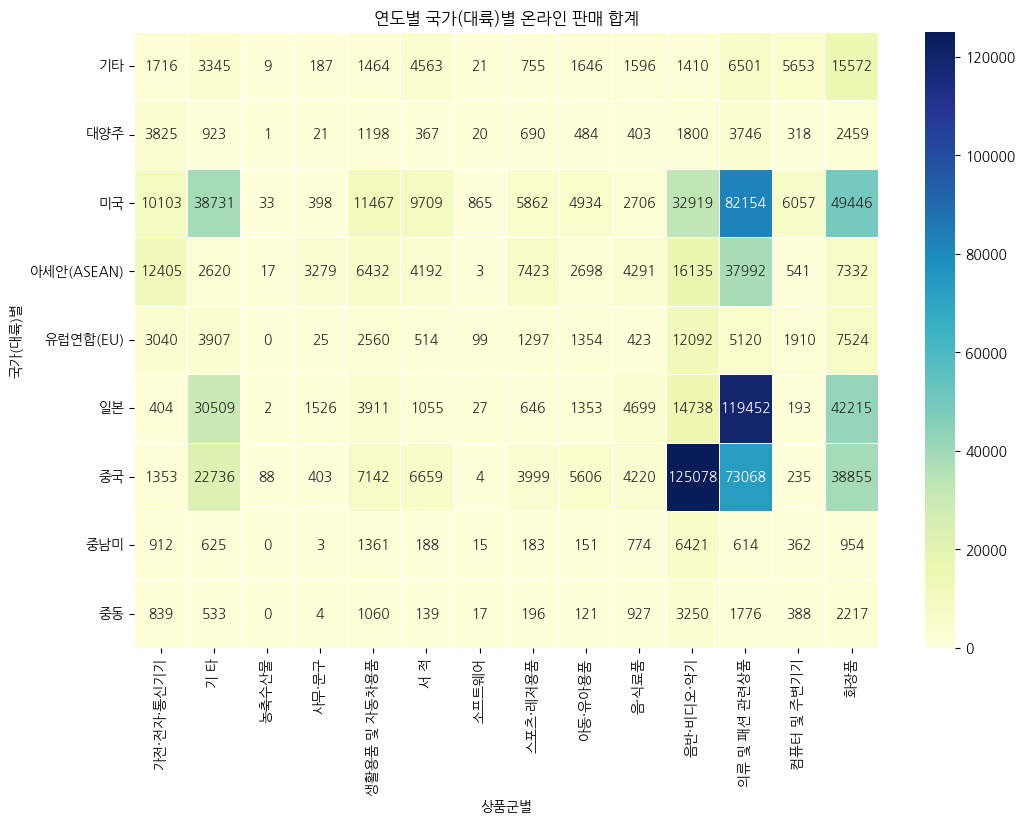

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_sales_2020, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title("연도별 국가(대륙)별 온라인 판매 합계")
plt.show()


<Figure size 1500x1000 with 0 Axes>

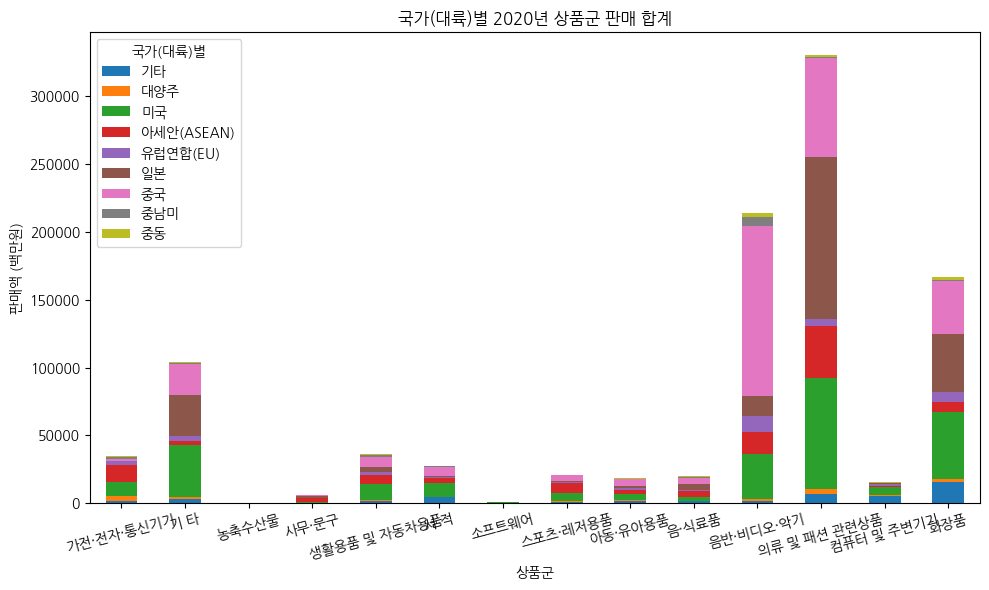

In [ ]:
plt.figure(figsize=(15, 10))
grouped_sales_2020.T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("국가(대륙)별 2020년 상품군 판매 합계")
plt.ylabel("판매액 (백만원)")
plt.xlabel("상품군")
plt.legend(title="국가(대륙)별")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.
* 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
* 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.


## A4

In [ ]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '시점', '데이터', '연도', '분기', '백만'], dtype='object')

In [ ]:
# 상품군별 값 확인
df['상품군별'].unique()

array(['컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구', '음반·비디오·악기',
       '의류 및 패션 관련상품', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품 및 자동차용품', '기 타'], dtype=object)

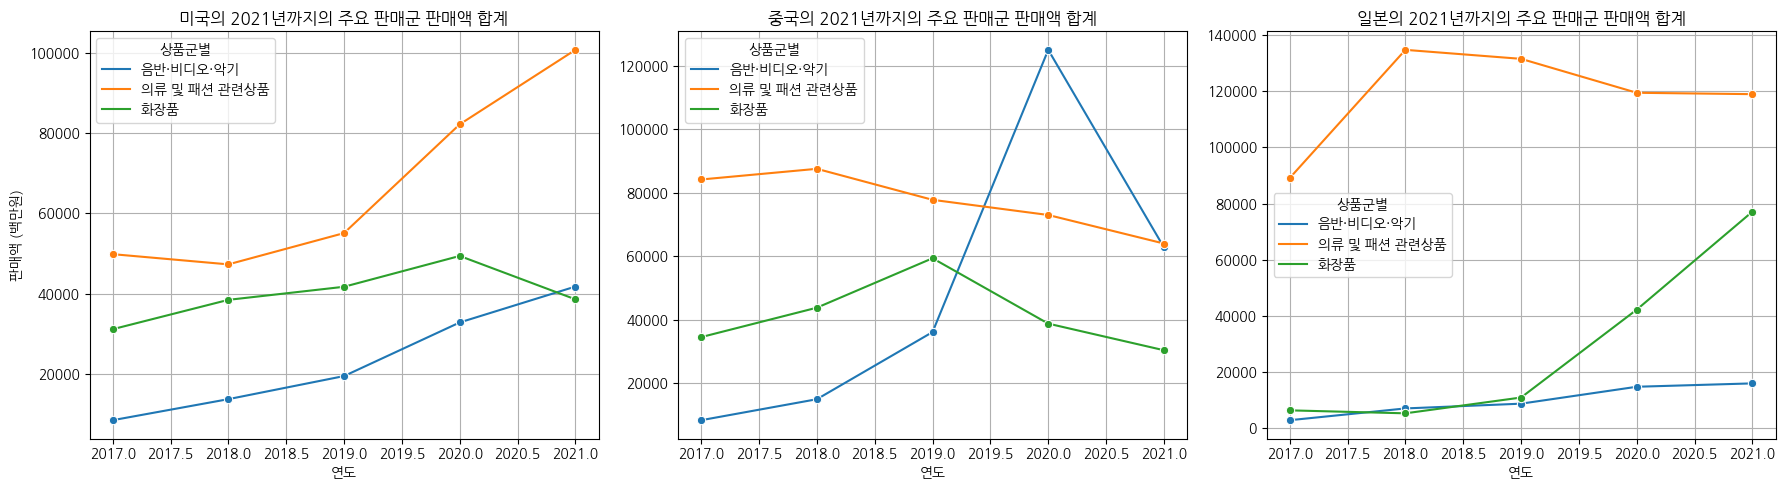

In [ ]:
# '미국', '중국', '일본' 각각에 대해 그래프 그리기
countries = ['미국', '중국', '일본']

plt.figure(figsize=(18, 5))

for idx, country in enumerate(countries, start=1):
    plt.subplot(1, 3, idx)
    country_data = grouped_data[grouped_data['국가(대륙)별'] == country]
    sns.lineplot(data=country_data, x='연도', y='백만', hue='상품군별', marker='o')
    plt.title(f"{country}의 2021년까지의 주요 판매군 판매액 합계")
    plt.ylabel("판매액 (백만원)")
    plt.xlabel("연도")
    plt.grid(True)
    if idx > 1:
        plt.ylabel("")
    plt.legend(title="상품군별")

plt.tight_layout()
plt.show()
